<a href="https://colab.research.google.com/github/Sujal0611/Gas-Material-Balance/blob/main/Havlena_Odeh_Gas_Cap_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Analysis Results ---
Original Oil-in-Place (N): 147.44 MMSTB
Gas Cap Size Ratio (m): 0.244
Initial Gas Cap Volume (G): 67.39 BCF


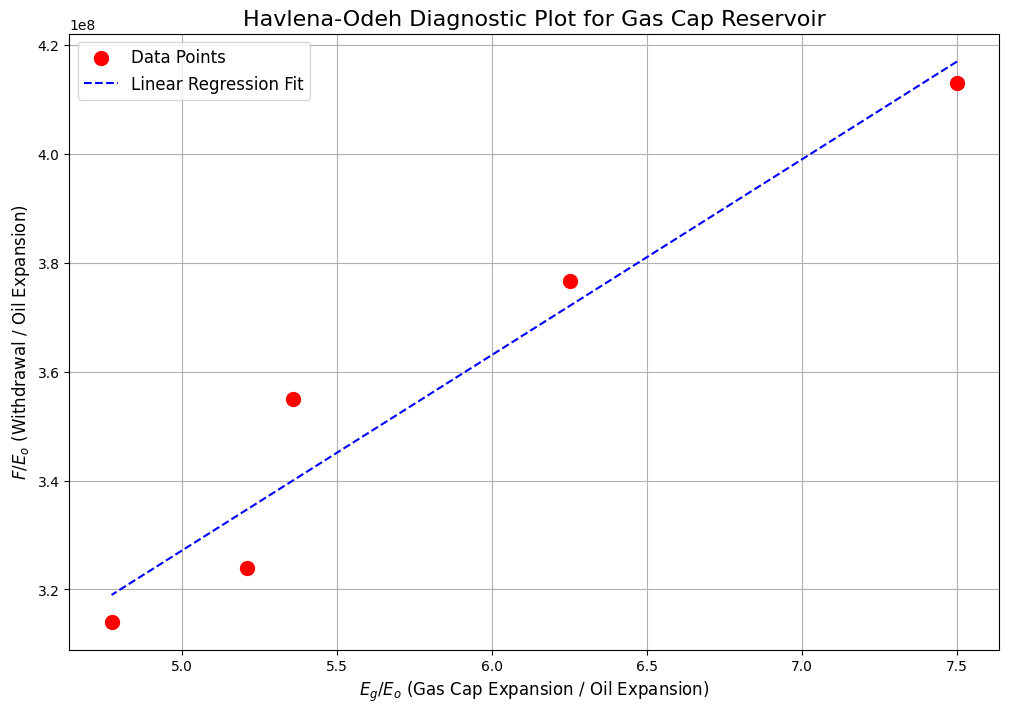

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def havelna_odeh_gas_cap_analysis():
    """
    This project uses the Havlena and Odeh material balance method to analyze a
    saturated oil reservoir with a gas cap. It calculates the Original Oil-in-Place (N)
    and the initial gas cap size ratio (m) by creating a diagnostic plot.
    """
    # This data simulates measurements from a saturated oil reservoir with a gas cap.
    data = {
        'Pressure_psi': [3000, 2800, 2600, 2400, 2200, 2000],
        'Np_MMSTB': [0, 5, 10, 15, 20, 25],      # Cumulative Oil Production
        'Gp_BCF': [0, 7, 15, 24, 35, 48],       # Cumulative Gas Production
        'Bo_bbl_STB': [1.50, 1.48, 1.46, 1.44, 1.42, 1.40], # Oil FVF
        'Bg_bbl_scf': [0.0008, 0.0009, 0.0010, 0.0011, 0.0013, 0.0015], # Gas FVF
        'Rs_scf_STB': [800, 750, 700, 650, 600, 550] # Solution Gas-Oil Ratio
    }
    df = pd.DataFrame(data)

    # Initial conditions are at the highest pressure
    Boi = df['Bo_bbl_STB'][0]
    Bgi = df['Bg_bbl_scf'][0]
    Rsi = df['Rs_scf_STB'][0]


    Np_STB = (df['Np_MMSTB'] * 1e6).to_numpy()
    Gp_scf = (df['Gp_BCF'] * 1e9).to_numpy()
    Bo = df['Bo_bbl_STB'].to_numpy()
    Bg = df['Bg_bbl_scf'].to_numpy()
    Rs = df['Rs_scf_STB'].to_numpy()

    # Calculate Havlena-Odeh Terms -
    # The MBE is rearranged into the form: F/Eo = N + N*m*(Eg/Eo)

    # Calculate Rp (Cumulative Gas-Oil Ratio). Handle division by zero for the first point.
    Rp = np.zeros_like(Np_STB)
    # The condition Np_STB > 0 ensures we don't divide by zero
    non_zero_np = Np_STB > 0
    Rp[non_zero_np] = Gp_scf[non_zero_np] / Np_STB[non_zero_np]

    # F = Underground Withdrawal
    F = Np_STB * (Bo + (Rp - Rs) * Bg)

    # Eo = Oil and Dissolved Gas Expansion Term
    Eo = (Bo - Boi) + (Rsi - Rs) * Bg

    # Eg = Gas Cap Expansion Term
    Eg = Boi * ((Bg / Bgi) - 1)

    # We plot F/Eo vs Eg/Eo. We must exclude the first data point
    # because Eo is zero at initial conditions, which would cause division by zero.
    F_div_Eo = F[1:] / Eo[1:]
    Eg_div_Eo = Eg[1:] / Eo[1:]

    # Linear Regression and Results -
    # Fit a straight line (y = mx + c) to the diagnostic plot data
    # Here, 'slope' is N*m and 'intercept' is N
    slope, intercept = np.polyfit(Eg_div_Eo, F_div_Eo, 1)

    # N is the y-intercept
    N = intercept
    # The plot's slope is N*m, so m = slope/N
    m = slope / N
    # Calculate initial gas cap volume in SCF
    G_scf = N * m * Boi / Bgi

    # Visualization -
    print("--- Analysis Results ---")
    print(f"Original Oil-in-Place (N): {N/1e6:.2f} MMSTB")
    print(f"Gas Cap Size Ratio (m): {m:.3f}")
    print(f"Initial Gas Cap Volume (G): {G_scf/1e9:.2f} BCF")

    plt.figure(figsize=(12, 8))

    # Plot the calculated data points and the linear fit
    plt.scatter(Eg_div_Eo, F_div_Eo, color='red', label='Data Points', zorder=5, s=100)
    plt.plot(Eg_div_Eo, slope * Eg_div_Eo + intercept, color='blue', linestyle='--', label='Linear Regression Fit')

    # Formatting the plot
    plt.title('Havlena-Odeh Diagnostic Plot for Gas Cap Reservoir', fontsize=16)
    plt.xlabel('$E_g / E_o$ (Gas Cap Expansion / Oil Expansion)', fontsize=12)
    plt.ylabel('$F / E_o$ (Withdrawal / Oil Expansion)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Display the plot
    plt.show()


# Run the Analysis
havelna_odeh_gas_cap_analysis()